## Loading Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from IPython.display import display

## Loading Dataset

In [2]:
data=pd.read_csv("C:\\Users\\Vrinda\\Downloads\\ahmadabad.csv")
print(data.head())

   State  District  Tehsil  T_V  WC  EB  EBX  C_HOUSE  IN_HH  BACT  ...  \
0     24         7       1    3   0  13    0        3      0     1  ...   
1     24         7       1    3   0  13    0        3      0     1  ...   
2     24         7       1    3   0  13    0        3      0     1  ...   
3     24         7       1    3   0  13    0        3      0     1  ...   
4     24         7       1    3   0  13    0        3      0     1  ...   

   RELIGION  NOP  SOF  M_H  F_H  M_NH  F_NH  TOTAL_WORKER  SECTOR  DISTRICT  
0         1    1    1    0    0     1     0             1       1      2407  
1         1    1    1    0    0     1     0             1       1      2407  
2         1    1    1    0    0     1     0             1       1      2407  
3         1    1    1    0    0     1     0             1       1      2407  
4         1    1    1    0    0     1     0             1       1      2407  

[5 rows x 25 columns]


## Loading Excel File to Display Labels of Data

In [3]:
file_path = "C:\\Users\\Vrinda\\Downloads\\Data_Labels.xlsx" 
labels = pd.read_excel(file_path)

labels

,Variable Name,Description,Values
0,SECTOR,NaN,NaN
1,ST,State Code,NaN
2,District,Four Digit District code (first two digits are...,NaN
3,Tahsil,Seven Digit Tahsil code (first four digits are...,NaN
4,Village_or_Town,Eleven Digit Village or Town code (first seven...,NaN
5,WC,Four Digit stand-alone code,ward no.
6,EB,Four Digit stand-alone code,NaN
7,EBX,Two Digit stand-along code,NaN
8,C_HOUSE,(1= Commercial; 2= Residential; 3 = Residentia...,1= Commercial; 2= Residential; 3 = Residential...
9,BACT,Broad Activity,01 - Activities relating to agriculture other ...


## Exploratory Data Analysis(EDA)

In [4]:
data.shape

(353015, 25)

In [5]:
data.info

<bound method DataFrame.info of         State  District  Tehsil   T_V  WC  EB  EBX  C_HOUSE  IN_HH  BACT  ...  \
0          24         7       1     3   0  13    0        3      0     1  ...   
1          24         7       1     3   0  13    0        3      0     1  ...   
2          24         7       1     3   0  13    0        3      0     1  ...   
3          24         7       1     3   0  13    0        3      0     1  ...   
4          24         7       1     3   0  13    0        3      0     1  ...   
...       ...       ...     ...   ...  ..  ..  ...      ...    ...   ...  ...   
353010     24         7       8  7047   5  34    0        1      0    23  ...   
353011     24         7       8  7047   8  60    1        1      0    23  ...   
353012     24         7      10  7047   1   1    0        1      0    23  ...   
353013     24         7      10  7047   2   8    0        1      0    23  ...   
353014     24         7      11  7049   8  52    0        1      0    23  ...

In [6]:
data.describe()

,State,District,Tehsil,T_V,WC,EB,EBX,C_HOUSE,IN_HH,BACT,...,RELIGION,NOP,SOF,M_H,F_H,M_NH,F_NH,TOTAL_WORKER,SECTOR,DISTRICT
count,353015.0,353015.0,353015.000000,353015.000000,353015.000000,353015.000000,353015.000000,353015.000000,353015.000000,353015.000000,...,353015.000000,353015.000000,353015.000000,353015.000000,353015.000000,353015.000000,353015.000000,353015.000000,353015.000000,353015.0
mean,24.0,7.0,5.196858,5905.478824,23.289676,108.333026,0.152314,1.677059,0.124779,10.874447,...,2.234203,1.143280,2.770446,1.417574,0.252001,0.929643,0.268040,2.867258,1.836811,2407.0
std,0.0,0.0,1.252903,2596.782042,65.596941,86.130929,0.502035,0.946420,0.365242,5.796935,...,2.891985,0.925008,3.233345,93.983050,4.002942,0.996790,1.266582,94.290136,0.369538,0.0
min,24.0,7.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2407.0
25%,24.0,7.0,5.000000,7043.000000,2.000000,42.000000,0.000000,1.000000,0.000000,6.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,2407.0
50%,24.0,7.0,5.000000,7043.000000,21.000000,93.000000,0.000000,1.000000,0.000000,12.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,2.000000,2407.0
75%,24.0,7.0,5.000000,7043.000000,40.000000,156.000000,0.000000,3.000000,0.000000,13.000000,...,2.000000,1.000000,2.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,2407.0
max,24.0,7.0,27.000000,8704.000000,7043.000000,2201.000000,4.000000,3.000000,31.000000,23.000000,...,9.000000,9.000000,9.000000,55554.000000,1600.000000,71.000000,90.000000,55555.000000,2.000000,2407.0


In [7]:
data.dtypes

State           int64
District        int64
Tehsil          int64
T_V             int64
WC              int64
EB              int64
EBX             int64
C_HOUSE         int64
IN_HH           int64
BACT            int64
NIC3            int64
HLOOM_ACT       int64
OWN_SHIP_C      int64
SEX             int64
SG              int64
RELIGION        int64
NOP             int64
SOF             int64
M_H             int64
F_H             int64
M_NH            int64
F_NH            int64
TOTAL_WORKER    int64
SECTOR          int64
DISTRICT        int64
dtype: object

In [8]:
data.columns

Index(['State', 'District', 'Tehsil', 'T_V', 'WC', 'EB', 'EBX', 'C_HOUSE',
       'IN_HH', 'BACT', 'NIC3', 'HLOOM_ACT', 'OWN_SHIP_C', 'SEX', 'SG',
       'RELIGION', 'NOP', 'SOF', 'M_H', 'F_H', 'M_NH', 'F_NH', 'TOTAL_WORKER',
       'SECTOR', 'DISTRICT'],
      dtype='object')

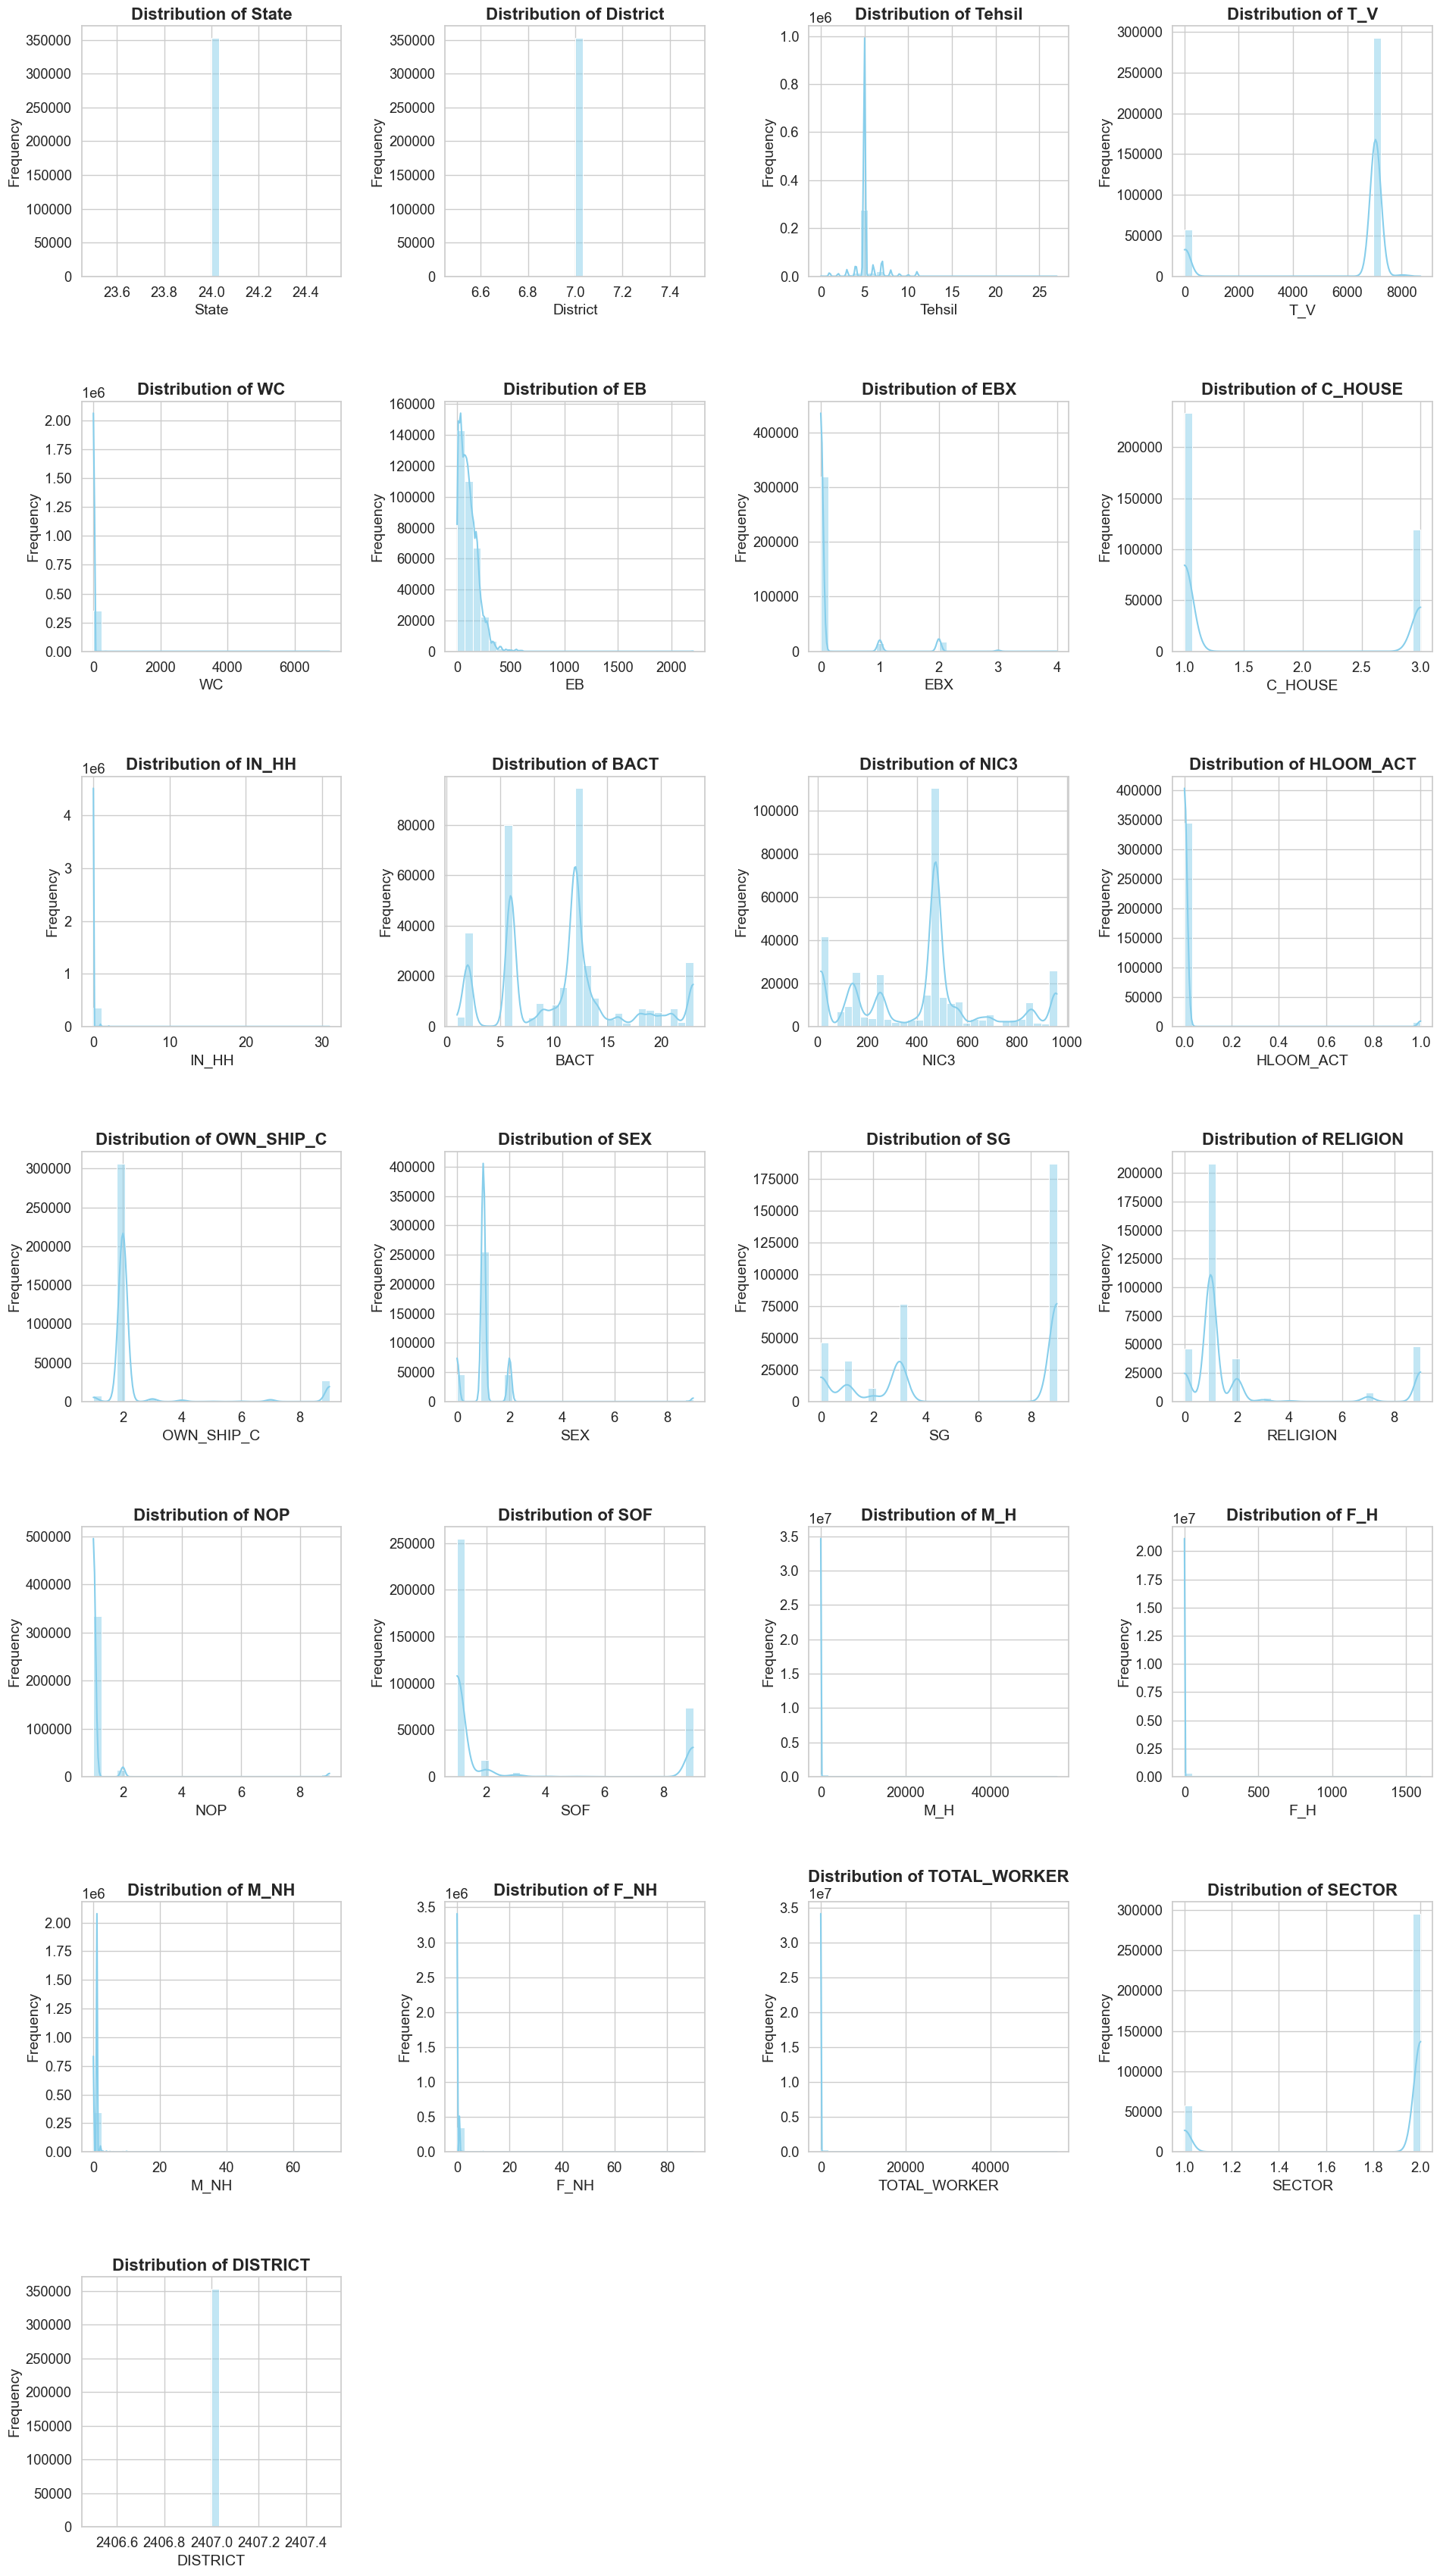

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set_theme(style="whitegrid", palette="pastel", font_scale=1.2)

# number of rows and columns 
n_cols = 4  
n_rows = (len(data.columns) + n_cols - 1) // n_cols  

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))  
axes = axes.flatten()

# Loop through each column 
for i, column in enumerate(data.columns):
    # Checking if the column is numeric
    if pd.api.types.is_numeric_dtype(data[column]):
        sns.histplot(data[column], kde=True, bins=30, ax=axes[i], color='skyblue')
        axes[i].set_title(f"Distribution of {column}", fontsize=16, weight='bold')
        axes[i].set_xlabel(column, fontsize=14)
        axes[i].set_ylabel("Frequency", fontsize=14)
    else:
        # For categorical data
        sns.countplot(y=data[column], order=data[column].value_counts().index, ax=axes[i], palette='muted')
        axes[i].set_title(f"Count Plot of {column}", fontsize=16, weight='bold')
        axes[i].set_xlabel("Count", fontsize=14)
        axes[i].set_ylabel(column, fontsize=14)

# Remove empty subplots 
for j in range(len(data.columns), len(axes)):
    fig.delaxes(axes[j])

# layout 
plt.tight_layout(pad=3.0)
plt.subplots_adjust(wspace=0.4, hspace=0.5)  

plt.show()


In [10]:
data.isnull().sum()

State           0
District        0
Tehsil          0
T_V             0
WC              0
EB              0
EBX             0
C_HOUSE         0
IN_HH           0
BACT            0
NIC3            0
HLOOM_ACT       0
OWN_SHIP_C      0
SEX             0
SG              0
RELIGION        0
NOP             0
SOF             0
M_H             0
F_H             0
M_NH            0
F_NH            0
TOTAL_WORKER    0
SECTOR          0
DISTRICT        0
dtype: int64

## Data Cleaning and Preprocessing

In [11]:
# shape of the dataset before dropping duplicates
print("Shape before dropping duplicates:", data.shape)

# Drop duplicate rows
data = data.drop_duplicates()

# shape of the dataset after dropping duplicates
print("Shape after dropping duplicates:", data.shape)

Shape before dropping duplicates: (353015, 25)
Shape after dropping duplicates: (254116, 25)


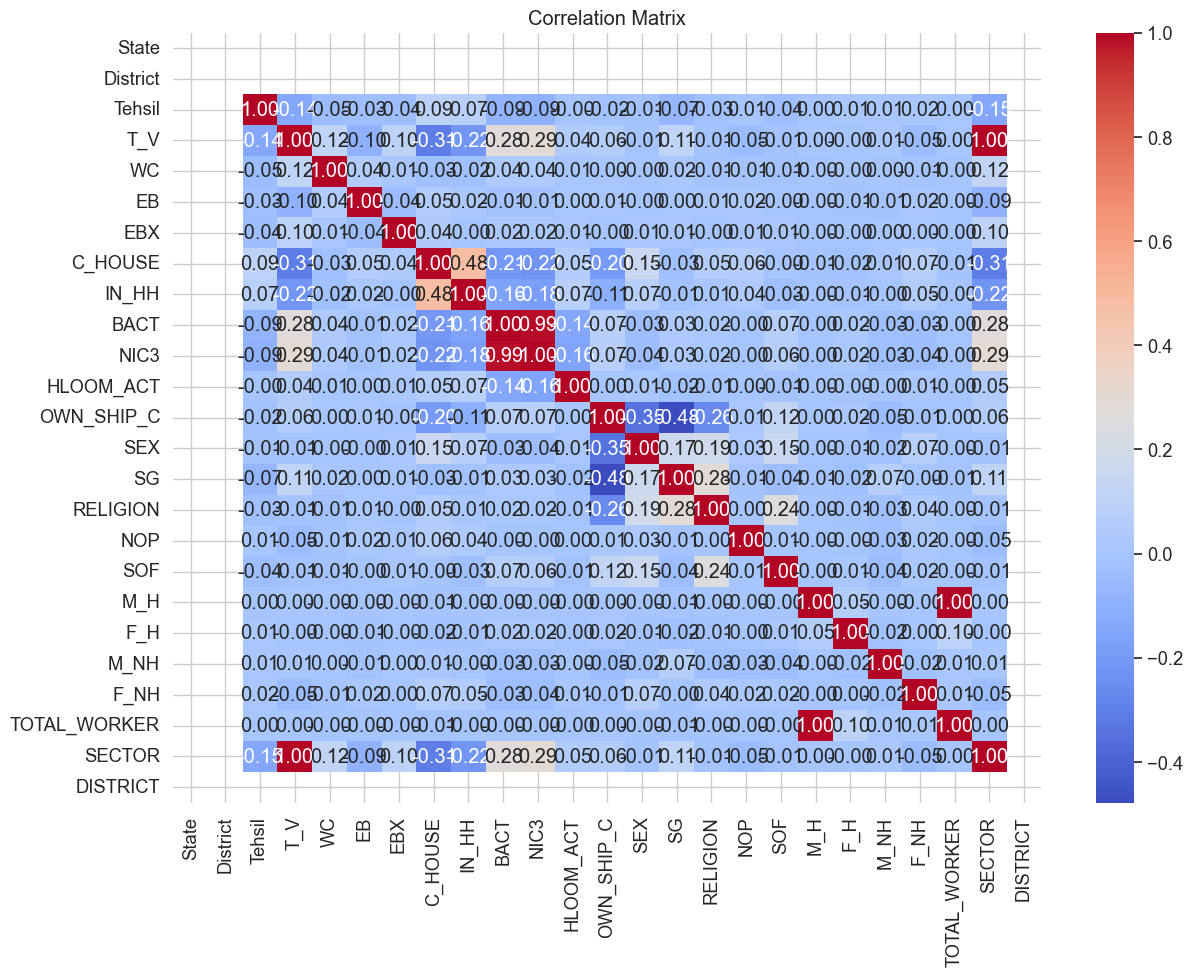

In [12]:
# correlation matrix
correlation_matrix = data.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix")
plt.show()


In [13]:
## Drop Irrelevant / Unnecessary variables
sample=data
sample.drop(['SECTOR','State','District','Tehsil','WC','EB','EBX','NIC3','District','T_V','TOTAL_WORKER'],axis=1,inplace=True)
print(sample.head())

    C_HOUSE  IN_HH  BACT  HLOOM_ACT  OWN_SHIP_C  SEX  SG  RELIGION  NOP  SOF  \
0         3      0     1          0           2    1   9         1    1    1   
1         3      0     1          0           2    1   3         1    1    1   
7         3      0     1          0           2    1   3         1    1    1   
8         3      0     1          0           2    2   3         1    1    1   
13        3      0     1          0           2    1   1         1    1    1   

    M_H  F_H  M_NH  F_NH  DISTRICT  
0     0    0     1     0      2407  
1     0    0     1     0      2407  
7     0    0     1     0      2407  
8     0    0     0     1      2407  
13    1    0     1     0      2407  


C:\Users\Vrinda\AppData\Local\Temp\ipykernel_10368\608176618.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample.drop(['SECTOR','State','District','Tehsil','WC','EB','EBX','NIC3','District','T_V','TOTAL_WORKER'],axis=1,inplace=True)


In [14]:
sample.shape

(254116, 15)

#### Outlier Handling

In [15]:
column = ['C_HOUSE','IN_HH','BACT','HLOOM_ACT','OWN_SHIP_C','SEX','SG','RELIGION','NOP','SOF','M_H','F_H','M_NH','F_NH']

Q1 = sample[column].quantile(0.25)
Q3 = sample[column].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = sample[(sample[column] < lower_bound) | (sample[column] > upper_bound)]
print(f"Number of outliers in '{column}': {len(outliers)}")
print(outliers)

# Treat outliers

# 1
data_no_outliers = sample[(sample[column] >= lower_bound) & (sample[column] <= upper_bound)]

# 2
data_winsorized = sample.copy()
data_winsorized[column] = np.where(sample[column] < lower_bound, lower_bound,
                                   np.where(sample[column] > upper_bound, upper_bound, sample[column]))


print("Outlier treatment completed.")


Number of outliers in '['C_HOUSE', 'IN_HH', 'BACT', 'HLOOM_ACT', 'OWN_SHIP_C', 'SEX', 'SG', 'RELIGION', 'NOP', 'SOF', 'M_H', 'F_H', 'M_NH', 'F_NH']': 254116
        C_HOUSE  IN_HH  BACT  HLOOM_ACT  OWN_SHIP_C  SEX  SG  RELIGION  NOP  \
0           NaN    NaN   NaN        NaN         NaN  NaN NaN       NaN  NaN   
1           NaN    NaN   NaN        NaN         NaN  NaN NaN       NaN  NaN   
7           NaN    NaN   NaN        NaN         NaN  NaN NaN       NaN  NaN   
8           NaN    NaN   NaN        NaN         NaN  2.0 NaN       NaN  NaN   
13          NaN    NaN   NaN        NaN         NaN  NaN NaN       NaN  NaN   
...         ...    ...   ...        ...         ...  ...  ..       ...  ...   
352563      NaN    1.0   NaN        NaN         NaN  2.0 NaN       NaN  NaN   
352564      NaN    NaN   NaN        NaN         NaN  NaN NaN       9.0  NaN   
352565      NaN    NaN   NaN        NaN         NaN  NaN NaN       9.0  NaN   
352566      NaN    NaN   NaN        NaN         NaN  

#### Check For Normalization

In [16]:
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Check normalization 
normalization_results = {}

for column in numeric_columns:
    mean = sample[column].mean()
    std_dev = sample[column].std()
    
    normalization_results[column] = {
        'Mean': mean,
        'Standard Deviation': std_dev,
        'Normalized': round(mean, 5) == 0 and round(std_dev, 5) == 1
    }

normalization_df = pd.DataFrame(normalization_results).T
print(normalization_df)


                 Mean Standard Deviation Normalized
C_HOUSE      1.617135           0.923806      False
IN_HH         0.11891           0.369028      False
BACT        11.471576           5.788347      False
HLOOM_ACT    0.022852           0.149431      False
OWN_SHIP_C   2.700251           2.067089      False
SEX          1.096621           1.071228      False
SG           5.418226           3.836891      False
RELIGION     2.311755           3.000705      False
NOP          1.128249           0.843336      False
SOF          2.997533           3.364053      False
M_H          1.658498         110.765644      False
F_H          0.309858           4.701548      False
M_NH         0.926274           1.125863      False
F_NH         0.291749           1.451041      False
DISTRICT       2407.0                0.0      False


#### Multicollinearity Check

In [17]:
# only numeric columns 
numeric_data = sample.select_dtypes(include=['float64', 'int64'])

# small constant to avoid division by zero 
numeric_data += 1e-9

# VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = numeric_data.columns
vif_data["VIF"] = [
    variance_inflation_factor(numeric_data.values, i) 
    for i in range(numeric_data.shape[1])
]

# threshold for VIF 
threshold = 5

# Check for multicollinearity
if any(vif_data["VIF"] > threshold):
    print("Multicollinearity detected. Treatment is required.")
    print(vif_data[vif_data["VIF"] > threshold])  
else:
    print("No multicollinearity detected. It is fine.")
print("\nVIF Data:")
print(vif_data)


Multicollinearity detected. Treatment is required.
     Feature       VIF
14  DISTRICT  23.40996

VIF Data:
       Feature        VIF
0      C_HOUSE   1.406646
1        IN_HH   1.314446
2         BACT   1.078728
3    HLOOM_ACT   1.024273
4   OWN_SHIP_C   1.582935
5          SEX   1.206124
6           SG   1.382697
7     RELIGION   1.222276
8          NOP   1.005930
9          SOF   1.150523
10         M_H   1.002904
11         F_H   1.004270
12        M_NH   1.011845
13        F_NH   1.011435
14    DISTRICT  23.409960


#### Multicollinearity Treatment

In [18]:
# Function to calculate VIF and remove variables 
def treat_multicollinearity(data, threshold=5):
    while True:
        # Calculate VIF
        vif_data = pd.DataFrame()
        vif_data["Feature"] = data.columns
        vif_data["VIF"] = [
            variance_inflation_factor(data.values, i) 
            for i in range(data.shape[1])
        ]
        
        # Checking if any variable exceeds the threshold
        max_vif = vif_data["VIF"].max()
        if max_vif > threshold:
            # Drop the variable with the highest VIF
            feature_to_drop = vif_data.loc[vif_data["VIF"] == max_vif, "Feature"].values[0]
            print(f"Dropping '{feature_to_drop}' with VIF: {max_vif}")
            data = data.drop(columns=[feature_to_drop])
        else:
            break
    
    return data, vif_data

# Apply the function
treated_data, final_vif = treat_multicollinearity(numeric_data, threshold=5)

# Display 
print("Final VIF Values:")
print(final_vif)


Dropping 'DISTRICT' with VIF: 23.409960250270128
Final VIF Values:
       Feature       VIF
0      C_HOUSE  4.235102
1        IN_HH  1.440470
2         BACT  4.204759
3    HLOOM_ACT  1.041100
4   OWN_SHIP_C  2.783904
5          SEX  2.309809
6           SG  3.172639
7     RELIGION  1.932557
8          NOP  2.642541
9          SOF  2.062372
10         M_H  1.003043
11         F_H  1.008217
12        M_NH  1.631969
13        F_NH  1.052285


In [19]:
# Dropping variable with Multicollinearity
sample.drop(['DISTRICT'],axis=1,inplace=True)

C:\Users\Vrinda\AppData\Local\Temp\ipykernel_10368\4226857940.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample.drop(['DISTRICT'],axis=1,inplace=True)


In [20]:
sample.columns

Index(['C_HOUSE', 'IN_HH', 'BACT', 'HLOOM_ACT', 'OWN_SHIP_C', 'SEX', 'SG',
       'RELIGION', 'NOP', 'SOF', 'M_H', 'F_H', 'M_NH', 'F_NH'],
      dtype='object')

## Feature Engineering

In [21]:
X = sample.drop(columns=["C_HOUSE"])
y = sample["C_HOUSE"]

In [22]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Apply standardization to the features
sample = scaler.fit_transform(X)  
sample = pd.DataFrame(sample, columns=X.columns)

print(sample.describe())  


              IN_HH          BACT     HLOOM_ACT    OWN_SHIP_C           SEX  \
count  2.541160e+05  2.541160e+05  2.541160e+05  2.541160e+05  2.541160e+05   
mean   3.840492e-17  6.196236e-17 -2.073334e-17  2.380210e-17 -2.805922e-17   
std    1.000002e+00  1.000002e+00  1.000002e+00  1.000002e+00  1.000002e+00   
min   -3.222258e-01 -1.809083e+00 -1.529254e-01 -8.225357e-01 -1.023706e+00   
25%   -3.222258e-01 -9.452763e-01 -1.529254e-01 -3.387626e-01 -9.019684e-02   
50%   -3.222258e-01  9.129119e-02 -1.529254e-01 -3.387626e-01 -9.019684e-02   
75%   -3.222258e-01  4.368137e-01 -1.529254e-01 -3.387626e-01 -9.019684e-02   
max    8.368230e+01  1.991665e+00  6.539135e+00  3.047649e+00  7.377880e+00   

                 SG      RELIGION           NOP           SOF           M_H  \
count  2.541160e+05  2.541160e+05  2.541160e+05  2.541160e+05  2.541160e+05   
mean  -2.919165e-17 -9.931873e-17  1.371434e-16 -1.291815e-17 -2.193219e-19   
std    1.000002e+00  1.000002e+00  1.000002e+00  1.

## Train-Test Split

In [23]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Modelling

#### GradientBoostingClassifier Model

In [24]:

gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)

In [25]:

# Evaluation
print("Gradient Boosting Classifier:", accuracy_score(y_test, gb_pred))

Gradient Boosting Classifier: 0.8606760585550134


In [26]:
print("\nClassification Report for Gradient Boosting Classifier:")
print(classification_report(y_test, gb_pred))


Classification Report for Gradient Boosting Classifier:
              precision    recall  f1-score   support

           1       0.85      0.97      0.91     35333
           3       0.89      0.62      0.73     15491

    accuracy                           0.86     50824
   macro avg       0.87      0.79      0.82     50824
weighted avg       0.86      0.86      0.85     50824



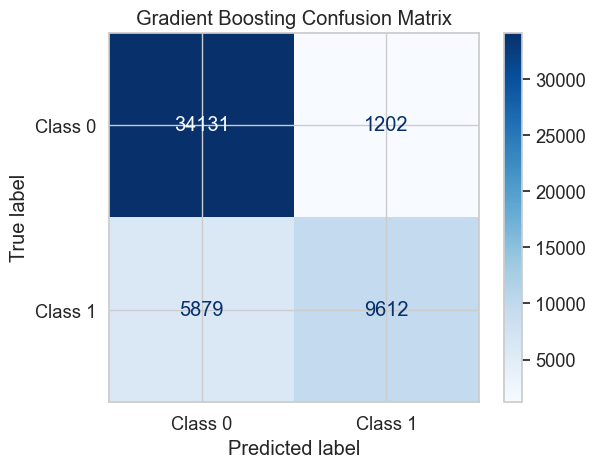

In [27]:
gb_cm = confusion_matrix(y_test, gb_pred)

# confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=gb_cm, display_labels=["Class 0", "Class 1"])
disp.plot(cmap="Blues")  # Customize the colormap
plt.title("Gradient Boosting Confusion Matrix")  # Add a title
plt.show()

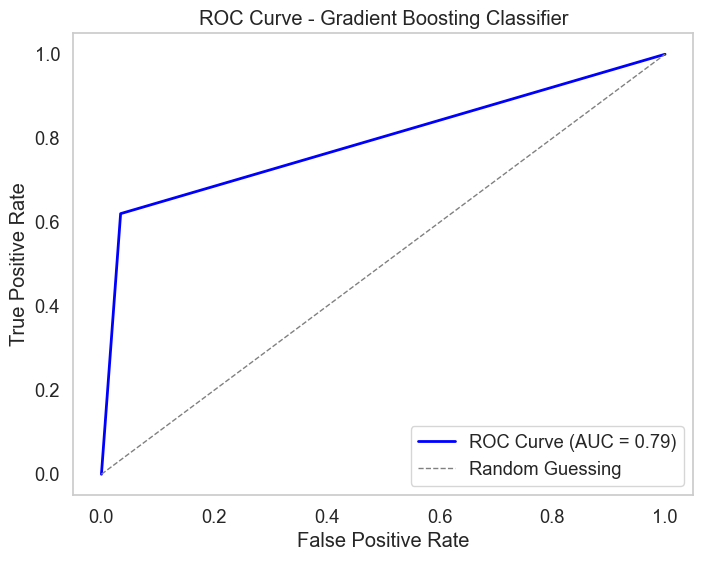

In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc 
# Calculate ROC curve for Gradient Boosting classification
fpr, tpr, thresholds = roc_curve(y_test, gb_pred, pos_label=3)

roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1, label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gradient Boosting Classifier')
plt.legend(loc="lower right")
plt.grid()
plt.show()


#### KNN Classifier

In [29]:

# Model 2: K-Nearest Neighbors Classifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

In [30]:
# Evaluation
print("K-Nearest Neighbors Classifier:", accuracy_score(y_test, knn_pred))

K-Nearest Neighbors Classifier: 0.8419053990240831


In [31]:
print("\nClassification Report for K-Nearest Neighbors Classifier:")
print(classification_report(y_test, knn_pred))


Classification Report for K-Nearest Neighbors Classifier:
              precision    recall  f1-score   support

           1       0.86      0.92      0.89     35333
           3       0.78      0.67      0.72     15491

    accuracy                           0.84     50824
   macro avg       0.82      0.79      0.80     50824
weighted avg       0.84      0.84      0.84     50824



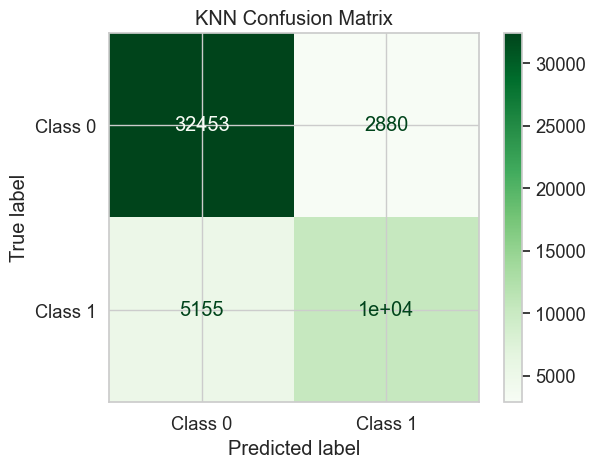

In [32]:
knn_cm = confusion_matrix(y_test, knn_pred)

# Use ConfusionMatrixDisplay to plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=knn_cm, display_labels=["Class 0", "Class 1"])
disp.plot(cmap="Greens")  # Customize the colormap
plt.title("KNN Confusion Matrix")  # Add a title
plt.show()

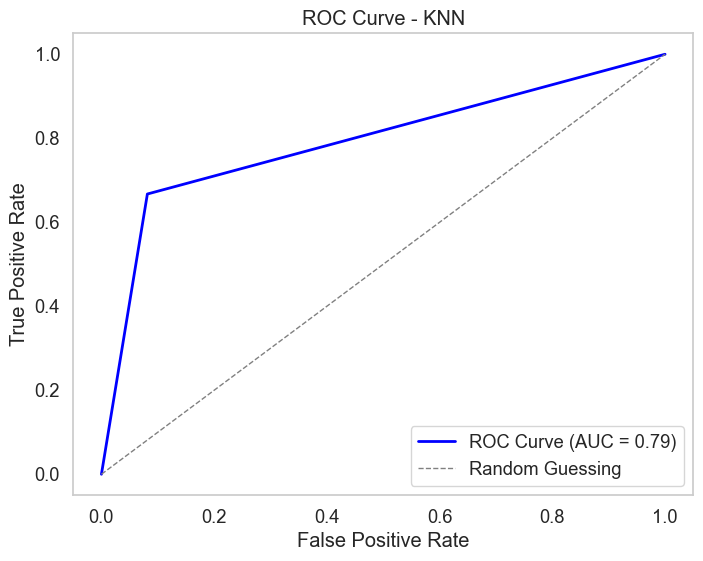

In [33]:
# Calculate ROC curve for KNN classification
fpr, tpr, thresholds = roc_curve(y_test, knn_pred, pos_label=3)

# Plot 
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1, label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - KNN')
plt.legend(loc="lower right")
plt.grid()
plt.show()


#### RandomForest Classifier

In [34]:

# Model 3: Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [35]:
# Evaluation
print("Random Forest:", accuracy_score(y_test, rf_pred))

Random Forest: 0.8607350857862427


In [36]:
print("\nClassification Report for Random Forest:")
print(classification_report(y_test, rf_pred))


Classification Report for Random Forest:
              precision    recall  f1-score   support

           1       0.86      0.95      0.90     35333
           3       0.85      0.66      0.74     15491

    accuracy                           0.86     50824
   macro avg       0.86      0.80      0.82     50824
weighted avg       0.86      0.86      0.86     50824



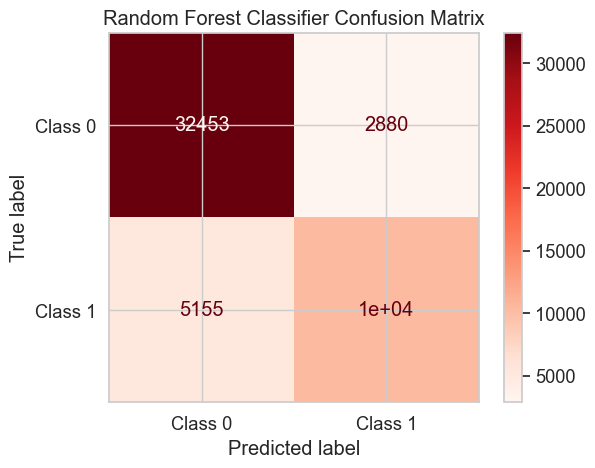

In [37]:
rf_cm = confusion_matrix(y_test, rf_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=knn_cm, display_labels=["Class 0", "Class 1"])
disp.plot(cmap="Reds")  
plt.title("Random Forest Classifier Confusion Matrix")  
plt.show()

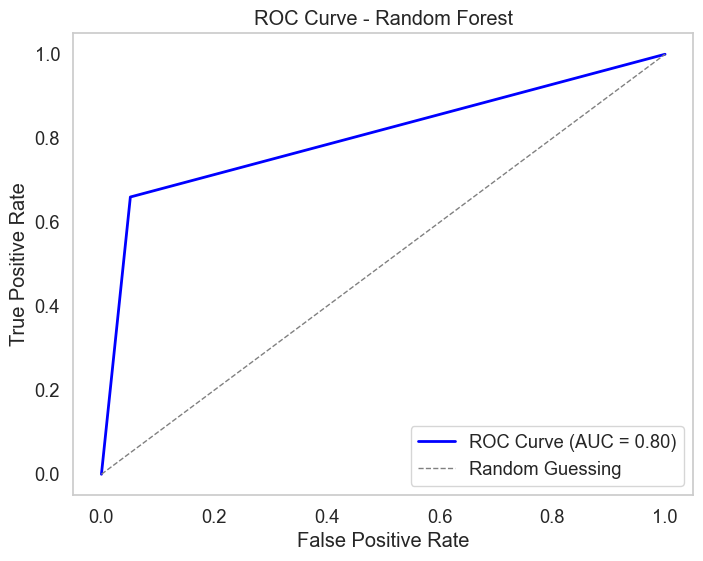

In [38]:
# Calculate ROC curve for KNN classification
fpr, tpr, thresholds = roc_curve(y_test, rf_pred, pos_label=3)

roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1, label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc="lower right")
plt.grid()
plt.show()


## Model Evaluation

C:\Users\Vrinda\AppData\Local\Temp\ipykernel_10368\1739924207.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=economic_census_models, y=economic_census_accuracies, palette='Blues')


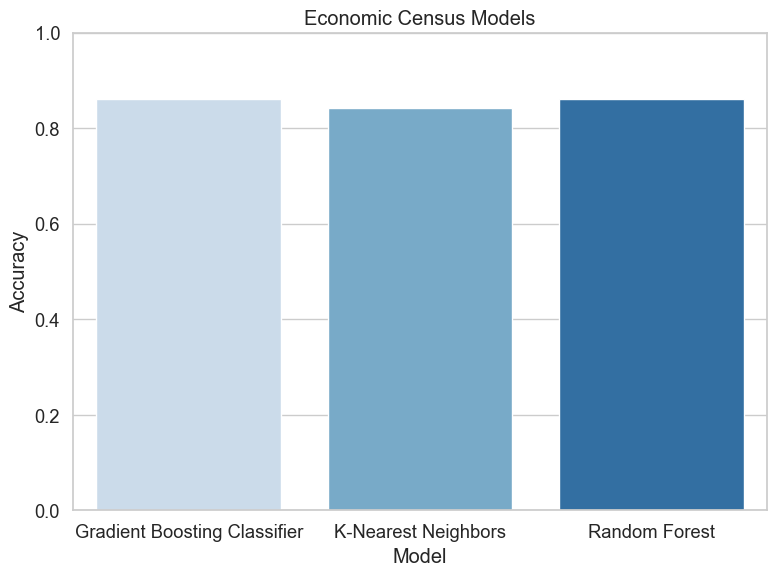

In [39]:

# Gradient Boosting Classifier
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)

# K-Nearest Neighbors Classifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

# Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# Comparison for Economic Census Models
economic_census_models = ['Gradient Boosting Classifier', 'K-Nearest Neighbors', 'Random Forest']
economic_census_accuracies = [
    accuracy_score(y_test, gb_pred),
    accuracy_score(y_test, knn_pred),
    accuracy_score(y_test, rf_pred)
]

#  Results
plt.figure(figsize=(8, 6))
sns.barplot(x=economic_census_models, y=economic_census_accuracies, palette='Blues')
plt.title('Economic Census Models')
plt.ylim(0, 1)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()


## Model Comparison

In [40]:

from sklearn.metrics import (
    cohen_kappa_score,
    r2_score,
    mean_squared_error,
    recall_score,
    precision_score,
    f1_score,
    confusion_matrix
)

# Root Mean Square Error (RMSE)
def calculate_rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Residual Sum of Squares (RSS)
def calculate_rss(y_true, y_pred):
    return np.sum(np.square(y_true - y_pred))

# Sensitivity and Specificity
def calculate_sensitivity_specificity(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    sensitivity = cm[1, 1] / (cm[1, 1] + cm[1, 0])  
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])  
    return sensitivity, specificity

# Mean Absolute Percentage Error (MAPE)
def calculate_mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


In [41]:
# Initialize a dictionary to store metrics for all models
metrics_dict = {
    "Model": [],
    "Dataset": [],
    "R2": [],
    "Cohen's Kappa": [],
    "RMSE": [],
    "RSS": [],
    "Sensitivity": [],
    "Specificity": [],
    "F-Measure": [],
}

economic_census_models = ["Gradient Boosting Classifier", "K-Nearest Neighbors", "Random Forest"]
predictions = [gb_pred, knn_pred, rf_pred]  
y_tests = [y_test, y_test, y_test]  

# metrics for each model
for model_name, y_pred, y_test in zip(economic_census_models, predictions, y_tests):
    # Metrics Calculation
    r2 = r2_score(y_test, y_pred)
    cohen_kappa = cohen_kappa_score(y_test, y_pred)
    rmse = calculate_rmse(y_test, y_pred)
    rss = calculate_rss(y_test, y_pred)
    sensitivity, specificity = calculate_sensitivity_specificity(y_test, y_pred)
    f_measure = f1_score(y_test, y_pred)
    
   
    metrics_dict["Model"].append(model_name)
    metrics_dict["Dataset"].append("Economic Census")  
    metrics_dict["R2"].append(r2)
    metrics_dict["Cohen's Kappa"].append(cohen_kappa)
    metrics_dict["RMSE"].append(rmse)
    metrics_dict["RSS"].append(rss)
    metrics_dict["Sensitivity"].append(sensitivity)
    metrics_dict["Specificity"].append(specificity)
    metrics_dict["F-Measure"].append(f_measure)


metrics_df = pd.DataFrame(metrics_dict)

In [42]:

display(metrics_df)

,Model,Dataset,R2,Cohen's Kappa,RMSE,RSS,Sensitivity,Specificity,F-Measure
0,Gradient Boosting Classifier,Economic Census,0.342488,0.640793,0.746522,28324,0.620489,0.965981,0.906016
1,K-Nearest Neighbors,Economic Census,0.253904,0.610907,0.795222,32140,0.667226,0.918490,0.889842
2,Random Forest,Economic Census,0.342767,0.649449,0.746364,28312,0.660125,0.948688,0.904504


In [43]:
models = {
    "Model": ["Gradient Boosting Classifier", "K-Nearest Neighbors", "Random Forest"],
    "R2": [0.342488, 0.253904, 0.342767],
    "Cohen's Kappa": [0.640793, 0.610907, 0.649449],
    "RMSE": [0.746522, 0.795222, 0.746364],
    "F-Measure": [0.906016, 0.889842, 0.904504]
}

metrics_df = pd.DataFrame(models)

# Determine the best model 
best_model = None
best_score = float('-inf')  

for index, row in metrics_df.iterrows():
    # combined score
    score = (row['R2'] * 10) + (row["Cohen's Kappa"] * 10) + (row["F-Measure"] * 10) - (row["RMSE"] * 10)
    
    if score > best_score:
        best_score = score
        best_model = row['Model']

print(f"The best fitting model is: {best_model}")


The best fitting model is: Random Forest


## Prediction on Data using Best Fit Model

In [44]:
# predictions 
test_results = X_test.copy()
test_results['Actual'] = y_test
test_results['Predicted'] = rf_pred

C:\Users\Vrinda\AppData\Local\Temp\ipykernel_10368\825909655.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=rf_pred_enterprise, palette="viridis")


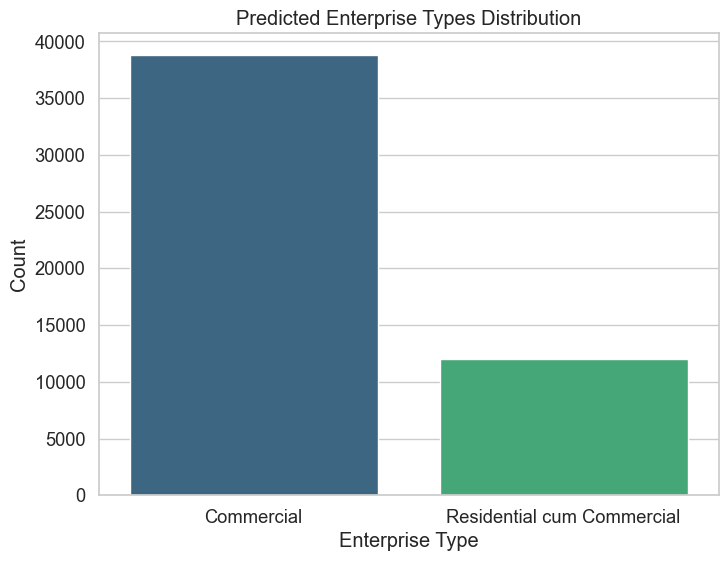

In [45]:
##predict the type of enterprise  based on its activity, ownership, and workforce distribution?

# Map`C_HOUSE` labels 
enterprise_labels = {
    1: "Commercial",
    2: "Residential",
    3: "Residential cum Commercial",
    9: "Others"
}

rf_pred_enterprise = pd.Series(rf_pred, name="Predicted Enterprise Type").map(enterprise_labels)

plt.figure(figsize=(8, 6))
sns.countplot(x=rf_pred_enterprise, palette="viridis")
plt.title("Predicted Enterprise Types Distribution")
plt.xlabel("Enterprise Type")
plt.ylabel("Count")
plt.show()


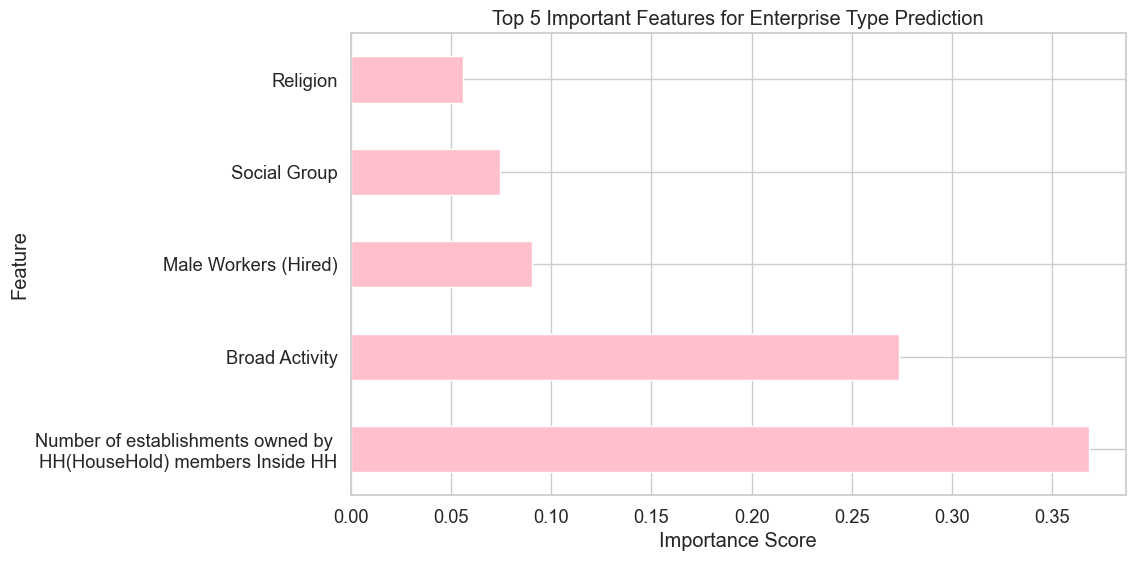

In [46]:
# Feature importance with updated labels
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns)

# Map labels to features
labels = {
    "SECTOR": "Sector",
    "ST": "State Code",
    "District": "District Code",
    "Tahsil": "Tahsil Code",
    "Village_or_Town": "Village/Town Code",
    "WC": "Ward Code",
    "EB": "EB Code",
    "EBX": "EBX Code",
    "C_HOUSE": "House Type",
    "BACT": "Broad Activity",
    "NIC3": "NIC Code",
    "HLOOM_ACT": "Handloom/Handicraft",
    "OWN_SHIP_C": "Ownership",
    "SEX": "Gender of Owner",
    "SG": "Social Group",
    "RELIGION": "Religion",
    "NOP": "Operation Nature",
    "SOF": "Finance Source",
    "NO_EBS": "Number of Establishments",
    "TOTAL_WORKERS": "Total Workers",
    "M_H": "Male Workers (Hired)",
    "F_H": "Female Workers (Hired)",
    "M_NH": "Male Workers (Not Hired)",
    "F_NH": "Female Workers (Not Hired)",
    "IN_HH": "Number of establishments owned by \nHH(HouseHold) members Inside HH",
    "TOTAL_WORKER": "Total Workers Employed",
    "DT": "District",
    "T_V": "Taluk/Village",
}

# Rename the feature 
feature_importances.index = feature_importances.index.map(labels)

# Plot Top 10 features
plt.figure(figsize=(10, 6))
feature_importances.nlargest(5).plot(kind='barh', color='pink')
plt.title('Top 5 Important Features for Enterprise Type Prediction')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()


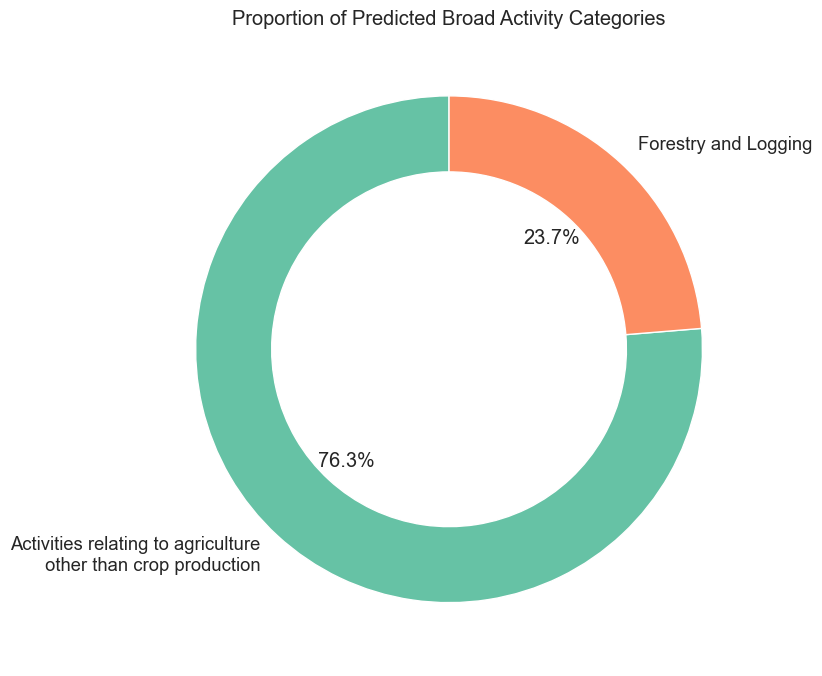

In [47]:
activity_labels = {
    1: "Activities relating to agriculture\n other than crop production",
    2: "Livestock",
    3: "Forestry and Logging",
    4: "Fishing and aqua culture",
    5: "Mining and quarrying",
    6: "Manufacturing",
    7: "Electricity, gas, steam and air conditioning supply",
    8: "Water supply, sewerage, waste management \nand remediation",
    9: "Construction",
    10: "Whole sale trade, retail trade & repair \nof motor vehicles",
    11: "Whole sale trade (not covered in item-10 above)",
    12: "Retail trade (not covered in item-10 above)",
    13: "Transportation and storage",
    14: "Accommodation and Food service activities",
    15: "Information & communication",
    16: "Financial and insurance activities",
    17: "Real estate activities",
    18: "Professional, scientific & technical activities",
    19: "Administrative and support service activities",
    20: "Education",
    21: "Human health & social work activities",
    22: "Arts, entertainment, sports & recreation",
    23: "Other service activities not elsewhere classified"
}

rf_pred_activity = pd.Series(rf_pred, name="Predicted Activity").map(activity_labels)

# Count occurrences 
activity_counts = rf_pred_activity.value_counts()

# chart
plt.figure(figsize=(10, 7))
colors = plt.cm.Set2.colors
plt.pie(
    activity_counts,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    labels=activity_counts.index,
    wedgeprops=dict(width=0.3)
)
plt.title("Proportion of Predicted Broad Activity Categories")
plt.tight_layout()
plt.show()
